# Lab 03: Quantity & Distribution Visualization

## Objectives

- Create **bar** and **dot** plots to compare quantities.  
- Build **stacked** and **grouped** bars for multi-category comparisons.  
- Make **bubble charts** responsibly (size ~ area).  
- Replace bubbles with **images** to create custom markers.  
- Compare **histograms, KDE, and frequency polygons** and choose binning rules.

**Tools Used**

- Google Colab
- NumPy
- Pandas
- Matplotlib
- Seaborn
- Scikitlearn

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.grid'] = True

## Datasets & Tools

- **`tips`**, **`penguins`**, **`diamonds`** (seaborn).  
- Simple **synthetic** data for bubble charts.

In [2]:
tips = sns.load_dataset('tips')
penguins = sns.load_dataset('penguins').dropna()
diamonds = sns.load_dataset('diamonds')
tips.head(), penguins.head(), diamonds.head()

(   total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3
 2       21.01  3.50    Male     No  Sun  Dinner     3
 3       23.68  3.31    Male     No  Sun  Dinner     2
 4       24.59  3.61  Female     No  Sun  Dinner     4,
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 0  Adelie  Torgersen            39.1           18.7              181.0   
 1  Adelie  Torgersen            39.5           17.4              186.0   
 2  Adelie  Torgersen            40.3           18.0              195.0   
 4  Adelie  Torgersen            36.7           19.3              193.0   
 5  Adelie  Torgersen            39.3           20.6              190.0   
 
    body_mass_g     sex  
 0       3750.0    Male  
 1       3800.0  Female  
 2       3250.0  Female  
 4       3450.0  Female  
 5       3650.0    Male  ,
    carat      cut color clarity  depth  table  price     x 

---

## Part A — Bar & Dot Plots

### A.1 Basic Bars

/tmp/ipython-input-2183297842.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_day = tips.groupby('day', as_index=False)['total_bill'].mean()


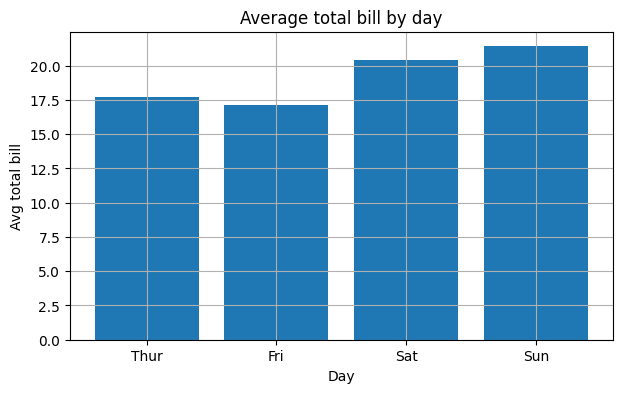

In [4]:
avg_day = tips.groupby('day', as_index=False)['total_bill'].mean()

plt.bar(avg_day['day'], avg_day['total_bill'])
plt.title('Average total bill by day')
plt.xlabel('Day'); plt.ylabel('Avg total bill')
plt.show()

### A.2 Dot (Strip) Plots

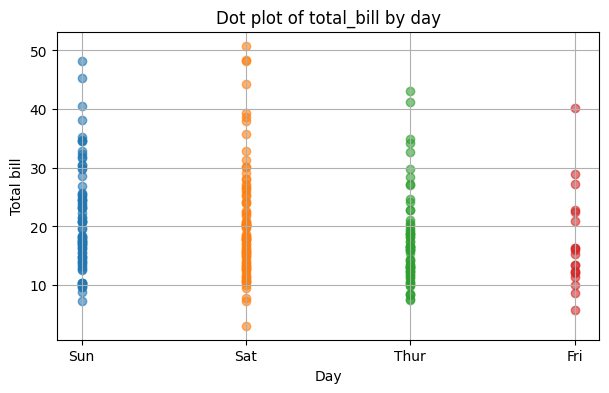

In [5]:
import matplotlib.pyplot as plt

days = tips['day'].unique()

for i, d in enumerate(days):
    vals = tips.loc[tips['day'] == d, 'total_bill']
    x = [i] * len(vals)
    plt.scatter(x, vals, alpha=0.6)

plt.xticks(range(len(days)), days)
plt.title('Dot plot of total_bill by day')
plt.xlabel('Day')
plt.ylabel('Total bill')
plt.show()

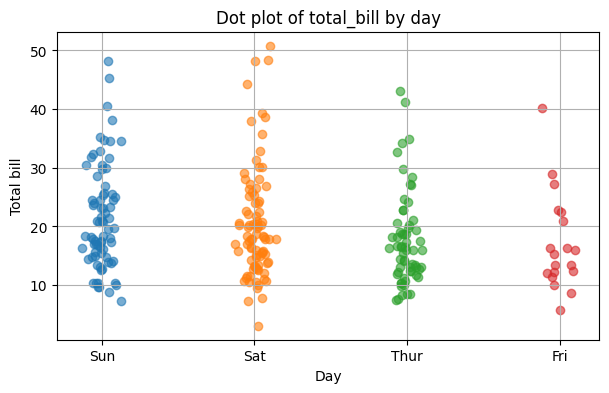

In [6]:
import matplotlib.pyplot as plt

days = tips['day'].unique()

for i, d in enumerate(days):
    vals = tips.loc[tips['day'] == d, 'total_bill']
    x = np.random.normal(loc=i, scale=0.05, size=len(vals))
    plt.scatter(x, vals, alpha=0.6)

plt.xticks(range(len(days)), days)
plt.title('Dot plot of total_bill by day')
plt.xlabel('Day')
plt.ylabel('Total bill')
plt.show()

### A.3 Grouped & Stacked Bars

/tmp/ipython-input-1053245095.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = tips.groupby(['day','smoker'])['total_bill'].mean().unstack()


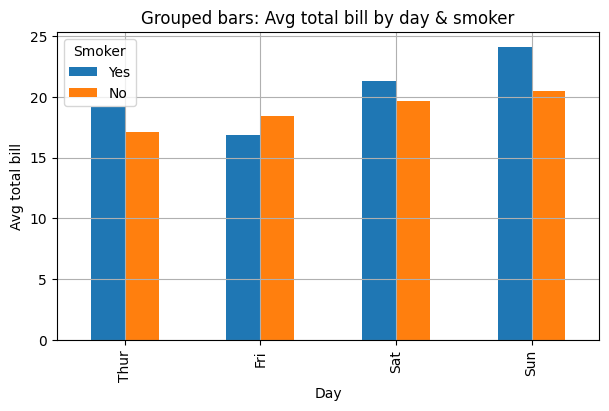

/tmp/ipython-input-1053245095.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = tips.groupby(['day','time']).size().unstack().fillna(0)


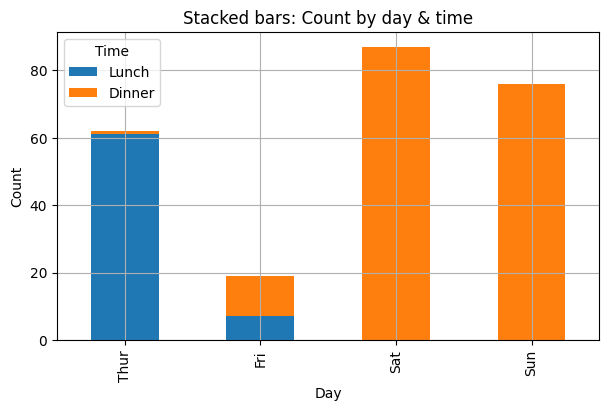

In [7]:
# Grouped: average total bill by day & smoker
grp = tips.groupby(['day','smoker'])['total_bill'].mean().unstack()

grp.plot(kind='bar')
plt.title('Grouped bars: Avg total bill by day & smoker')
plt.xlabel('Day'); plt.ylabel('Avg total bill')
plt.legend(title='Smoker')
plt.show()

# Stacked: convert to counts by time
counts = tips.groupby(['day','time']).size().unstack().fillna(0)
counts.plot(kind='bar', stacked=True)
plt.title('Stacked bars: Count by day & time')
plt.xlabel('Day'); plt.ylabel('Count')
plt.legend(title='Time')
plt.show()

#### ✅ Your Turn — Bars/Dots

1) Plot **grouped bars** of average `tip` by `sex` and `day`.  
2) Create a **lollipop plot**: stem + dot for `avg total_bill` by day (hint: `plt.hlines` + `plt.plot`).

/tmp/ipython-input-3689927142.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = tips.groupby(['day','sex'])['tip'].mean().unstack()


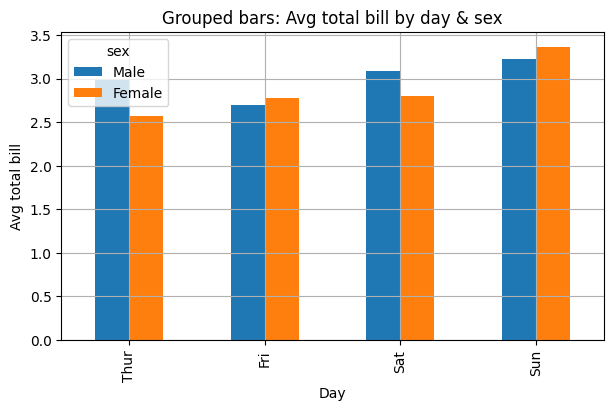

In [19]:
grp = tips.groupby(['day','sex'])['tip'].mean().unstack()

grp.plot(kind='bar')
plt.title('Grouped bars: Avg total bill by day & sex')
plt.xlabel('Day'); plt.ylabel('Avg total bill')
plt.legend(title='sex')
plt.show()

/tmp/ipython-input-2462537044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = tips.groupby(['sex','day'])['tip'].mean().unstack()


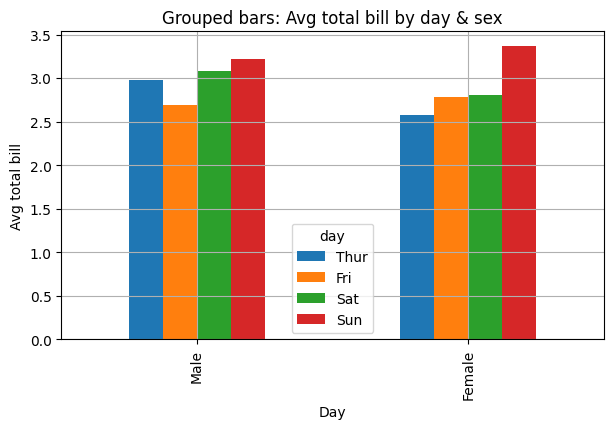

In [21]:
grp = tips.groupby(['sex','day'])['tip'].mean().unstack()

grp.plot(kind='bar')
plt.title('Grouped bars: Avg total bill by day & sex')
plt.xlabel('Day'); plt.ylabel('Avg total bill')
plt.legend(title='day')
plt.show()

/tmp/ipython-input-334630717.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bill = tips.groupby("day")["total_bill"].mean()


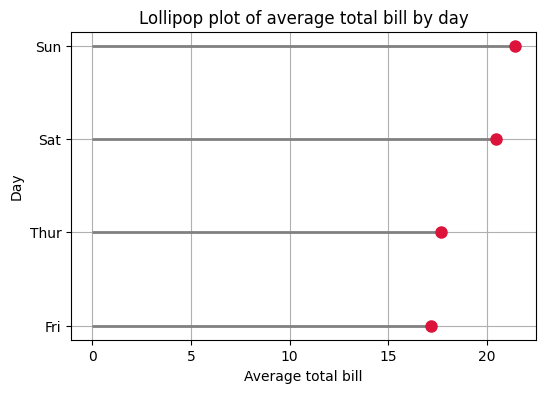

In [26]:
avg_bill = tips.groupby("day")["total_bill"].mean()
avg_bill = avg_bill.sort_values()

plt.figure(figsize=(6,4))
plt.hlines(y=avg_bill.index, xmin=0, xmax=avg_bill.values, color="gray", linewidth=2)
plt.plot(avg_bill.values, avg_bill.index, "o", color="#DC143C", markersize=8)

plt.xlabel("Average total bill")
plt.ylabel("Day")
plt.title("Lollipop plot of average total bill by day")
plt.show()

---

## Part B — Bubble Charts

**Use area to encode magnitude**, not radius. If radius \(r\) is proportional to value \(v\), area becomes \(\pi r^2\) and **over‑emphasizes large values**.

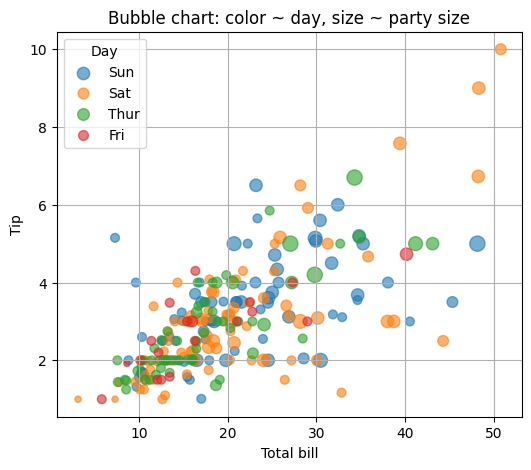

In [27]:
x = tips['total_bill']
y = tips['tip']
s = tips['size']
days = tips['day'].unique()

cat_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
color_map_cat = dict(zip(days, cat_colors))

plt.figure(figsize=(6,5))
for d in days:
    mask = tips['day'] == d
    plt.scatter(tips.loc[mask, 'total_bill'],
                tips.loc[mask, 'tip'],
                s=20 * tips.loc[mask, 'size'],
                c=color_map_cat[d],
                alpha=0.6,
                label=d)
plt.xlabel('Total bill'); plt.ylabel('Tip')
plt.title('Bubble chart: color ~ day, size ~ party size')
plt.legend(title="Day")
plt.show()

In [28]:
def hex_to_rgb01(h):
    h = h.lstrip('#')
    return np.array([int(h[i:i+2], 16)/255.0 for i in (0, 2, 4)], dtype=float)

def map_to_colors(vals, start_hex, end_hex, vmin=None, vmax=None):
    vals = np.asarray(vals, dtype=float)
    if vmin is None: vmin = np.nanmin(vals)
    if vmax is None: vmax = np.nanmax(vals)
    t = np.zeros_like(vals, dtype=float) if vmax == vmin else (vals - vmin) / (vmax - vmin)
    c0, c1 = hex_to_rgb01(start_hex), hex_to_rgb01(end_hex)
    return c0 + (c1 - c0) * t[:, None]

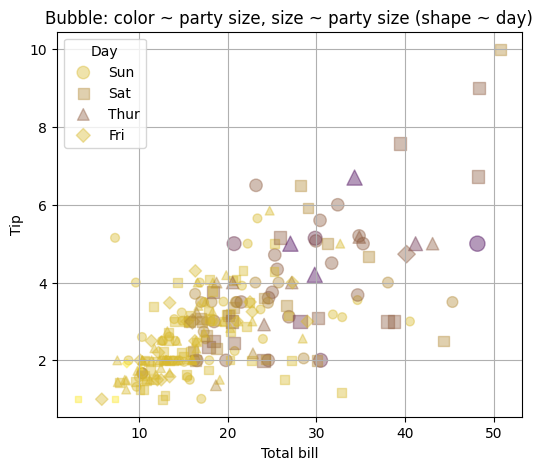

In [29]:
x = tips['total_bill']
y = tips['tip']
size = tips['size']
days = tips['day'].unique()

seq_start = '#fde725'
seq_end   = '#440154'
all_colors = map_to_colors(size.to_numpy(), seq_start, seq_end)

markers = ['o', 's', '^', 'D']
plt.figure(figsize=(6,5))
for i, d in enumerate(days):
    m = tips['day'] == d
    mask_np = m.to_numpy()
    plt.scatter(tips.loc[m, 'total_bill'],
                tips.loc[m, 'tip'],
                s=20 * tips.loc[m, 'size'],
                c=all_colors[mask_np],
                alpha=0.4,
                marker=markers[i % len(markers)],
                label=d)
plt.xlabel('Total bill'); plt.ylabel('Tip')
plt.title('Bubble: color ~ party size, size ~ party size (shape ~ day)')
plt.legend(title='Day')
plt.show()

---

## Part C — Histograms, KDE, Frequency Polygons

### C.1 Histograms & Binning
Explore different bin rules: `'sturges'`, `'fd'` (Freedman–Diaconis), `'sqrt'`.

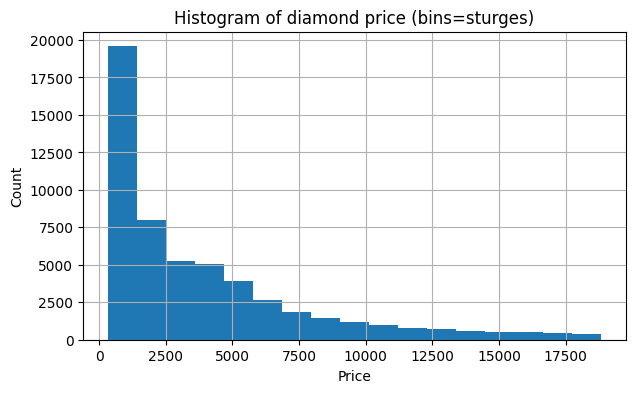

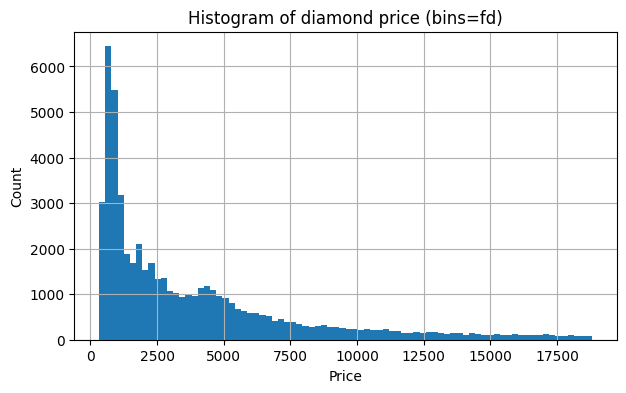

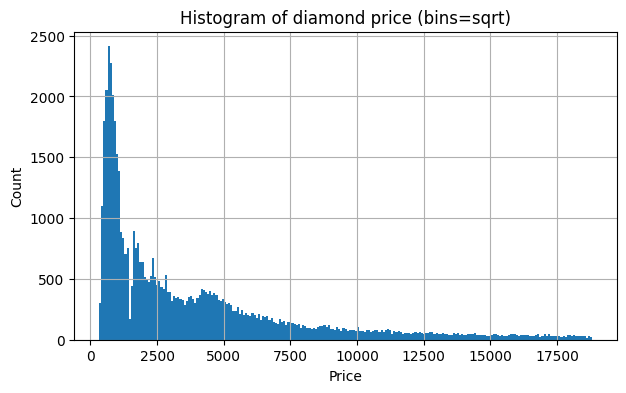

In [30]:
vals = diamonds['price']

for rule in ['sturges', 'fd', 'sqrt']:
    plt.hist(vals, bins=rule)
    plt.title(f'Histogram of diamond price (bins={rule})')
    plt.xlabel('Price'); plt.ylabel('Count')
    plt.show()

### C.2 KDE (Kernel Density Estimation)

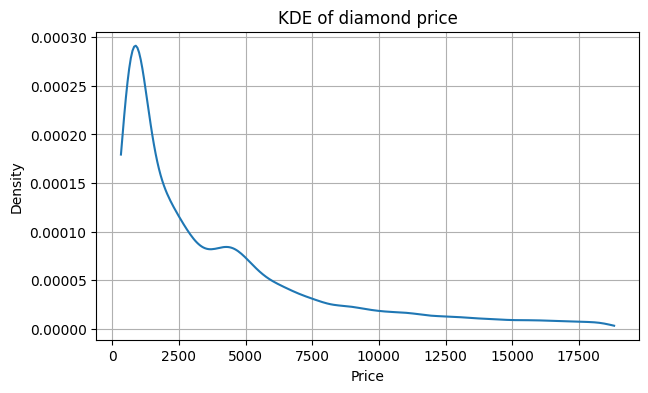

In [31]:
from scipy.stats import gaussian_kde

data = vals.dropna().to_numpy()
kde = gaussian_kde(data)
xs = np.linspace(data.min(), data.max(), 300)
plt.plot(xs, kde(xs))
plt.title('KDE of diamond price')
plt.xlabel('Price'); plt.ylabel('Density')
plt.show()

### C.3 Frequency Polygon

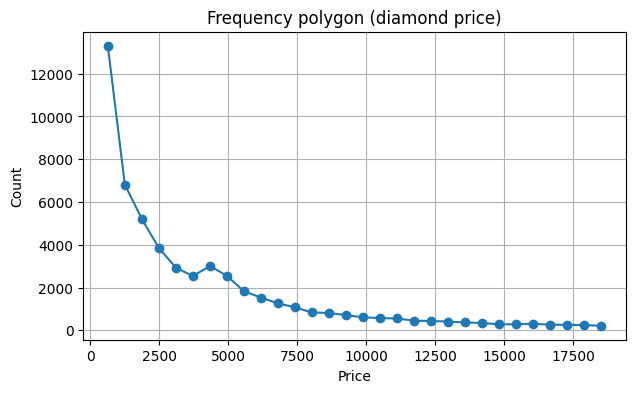

In [36]:
counts, bins = np.histogram(vals, bins=30)
centers = (bins[:-1] + bins[1:]) / 2
plt.plot(centers, counts, marker='o')
plt.title('Frequency polygon (diamond price)')
plt.xlabel('Price'); plt.ylabel('Count')
plt.show()

#### ✅ Your Turn — Compare Distributions

1) For `tips['tip']`, plot **histogram**, **KDE**, and **frequency polygon**. Comment on differences.  
2) Use at least **two binning rules** and explain how they change interpretation.

In [ ]:
# TODO: Your code for C.Your Turn

---